# Conceptual

__1.__ Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $R_1, R_2,\ldots,$ the cutpoints $t_1,t_2,\ldots,$ and so forth.  
_Hint: Your result should look something like Figures 8.1 and 8.2._

__SOLUTION__  
I will be using the same data set as Figures 8.1 and 8.2. So this will not have six regions but only three.

In [1]:
library(ISLR2)
library(tree)
Hitters <- na.omit(Hitters)
Hitters$Salary <- round(log(Hitters$Salary),2)

We grow our tree

node), split, n, deviance, yval
      * denotes terminal node

 1) root 263 207.100 5.927  
   2) Years < 4.5 90  42.300 5.107  
     4) Years < 3.5 62  22.930 4.892  
       8) Hits < 114 43  17.090 4.728  
        16) Hits < 40.5 5  10.360 5.510 *
        17) Hits > 40.5 38   3.264 4.625 *
       9) Hits > 114 19   2.053 5.264 *
     5) Years > 3.5 28  10.160 5.583 *
   3) Years > 4.5 173  72.770 6.354  
     6) Hits < 117.5 90  28.060 5.998  
      12) Years < 6.5 26   7.234 5.688 *
      13) Years > 6.5 64  17.320 6.124  
        26) Hits < 50.5 12   2.678 5.730 *
        27) Hits > 50.5 52  12.360 6.214 *
     7) Hits > 117.5 83  20.920 6.740 *

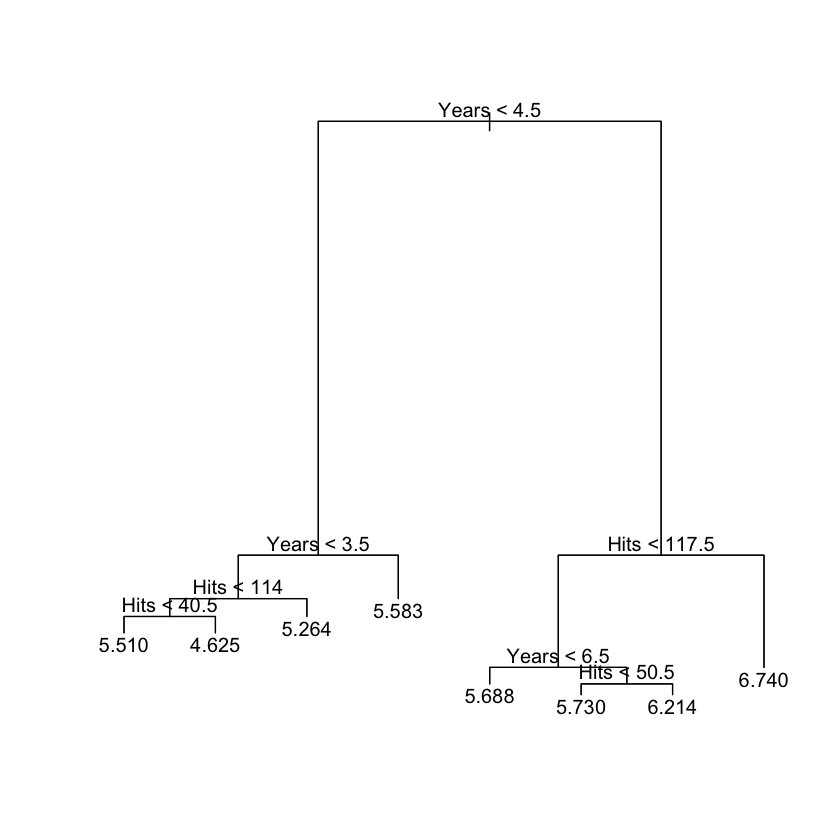

In [2]:
tree.hitters <- tree(Salary ~ Years + Hits, Hitters)
tree.hitters
plot(tree.hitters)
text(tree.hitters, pretty = 0)

Then we prune the tree of the branches we don't want. The final tree looks like the following.

Warning message in node.match(nodes, node, tree$frame$var == "<leaf>"):
“supplied nodes 7 are leaves”


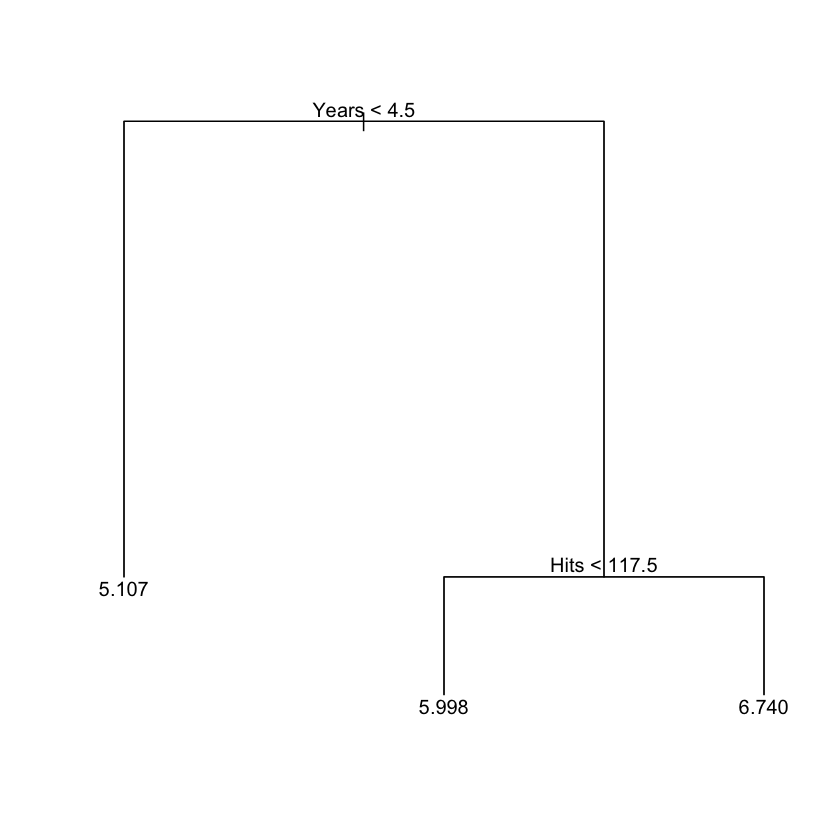

In [3]:
tree.hitters <- snip.tree(tree.hitters, c(2,6,7))
plot(tree.hitters)
text(tree.hitters, pretty = 0)

The data space looks like the following

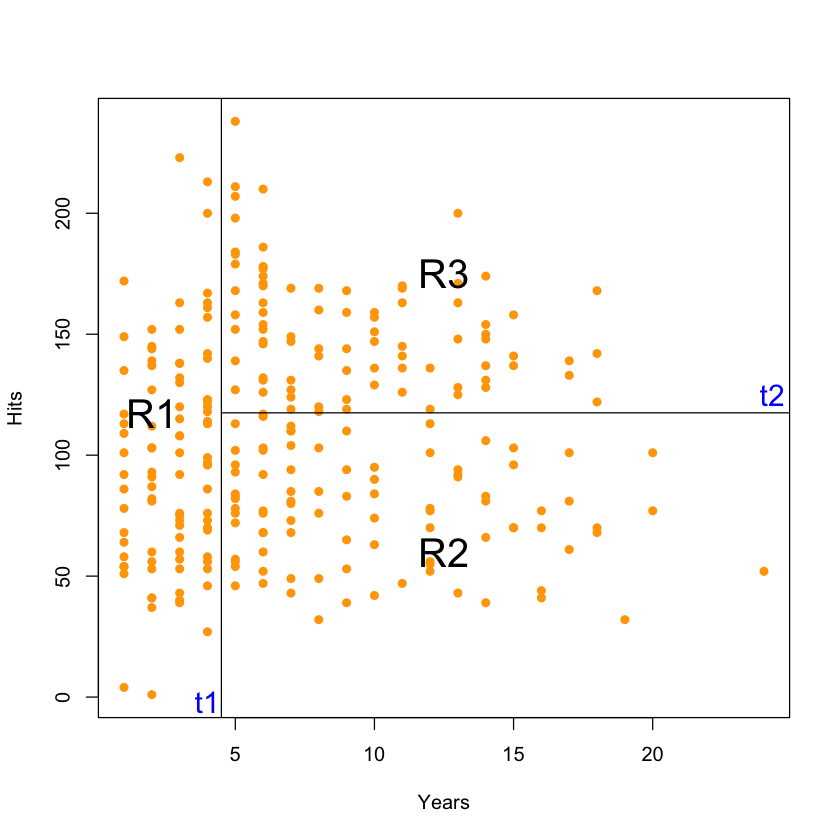

In [4]:
plot(Hitters$Years,Hitters$Hits, pch=16, col="orange", xlab="Years", ylab="Hits")
abline(v=4.5)
lines(x=c(4.5,25),y=c(117.5,117.5))
text(2,117.5, labels="R1",cex=2)
text(12.5, 60, labels="R2", cex=2)
text(12.5, 175, labels="R3", cex=2)
text(4, -2,labels="t1", cex=1.5, col="blue")
text(24.3, 125, labels="t2", cex=1.5, col="blue")

---

__2.__ It is mentioned in Section 8.2.3 that boosting using depth-one trees (or _stumps_) leads to an _additive_ model: that is, a model of the form
\begin{align}
f(X) = \sum^p_{j=1} {f_j(X_j)}\mathrm{.}
\end{align}
Explain why this is the case. You can begin with (8.12) in Algorithm 8.2.

---

__3.__ Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $\hat{p}_{m1}$, display $\hat{p}_{m1}$, ranging from $0$ to $1$, and the $y$-axis should display the value of the Gini index, classification error, and entropy.  
_Hint: In a setting with two classes,_ $\hat{p}_{m1} = 1 - \hat{p}_{m2}$. _You could make this plot by hand, but it will be much easier to make in `R`_.

---

__4.__ This question relates to the plots in Figure 8.14.  

(a) Sketch the tree corresponding to the partition of the predictor space illustrated in the left-hand panel of Figure 8.14. The numbers inside the boxes indicate the mean of $Y$ within each region.

(b) Create a diagram similar to the left-hand panel of Figure 8.14, using the tree illustrated in the right-hand panel of the same figure. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

---

__5.__ Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce $10$ estimates of $P(\mathrm{Class is Red}|X)$:
\begin{align}
0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, \mathrm{ and } 0.75\mathrm{.}
\end{align}
There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average of these two approaches?

---

__6.__ Provide a detailed explanation of the algorithm that is used to fit a regression tree.

---